 <h1><center>Credit Card Fraud Detection !</h1></center>




![Credit Card Fraud Detection](https://ai-journey.com/wp-content/uploads/2019/06/fraud-EMV-chip-credit-card.jpg)


using the [Credit Card Fraud Detection dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)




In [1]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline


### First let's import our dataset and take a look to it.

In [2]:
dataset = pd.read_csv("creditcard.csv")
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [5]:
x=dataset['Class'].value_counts()[1]
y=round(x/len(dataset)*100,3)
print('There are',x ,' frauds of ',len(dataset), 'transactions', 'which is',y,'% of the dataset')
print('There are',len(dataset)-x ,'No frauds of ',len(dataset), 'transactions', 'which is',100-y,'% of the dataset')



There are 492  frauds of  284807 transactions which is 0.173 % of the dataset
There are 284315 No frauds of  284807 transactions which is 99.827 % of the dataset


It's ImBalance Dataset
As per above class percentage its clear that our dataset is imbalanced dataset.We can seed Non-fraud transaction having 99.8% data and fraud transaction only 0.17%.

By using this imabalance dataset we never get accurate perfromance.

The base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!



# Cleaning and preprocessing:

In [6]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Great! there are No missing values

## It's better to scale/standardize our features value, so that they have the same scale


# try with standard scaler

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
dataset['Amount'] = std_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Time'],axis=1)
dataset.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Resampling

In [9]:
# Number of data points in the minority class
number_of_fraud=dataset['Class'].value_counts()[1]
number_of_fraud

492

In [10]:
fraud_indices = np.array(dataset[dataset.Class == 1].index)

nofraud_indices = dataset[dataset.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_of_fraud)
random_nofraud_indices = np.random.choice(nofraud_indices, number_of_fraud, replace = False)
random_nofraud_indices = np.array(random_nofraud_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_nofraud_indices])



In [11]:
under_sample_data = dataset.iloc[under_sample_indices,:]
under_sample_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154220,1.894788,-0.627767,0.081271,0.387055,-0.847983,0.158974,-1.116134,0.176436,2.550082,-0.218120,...,-0.076244,0.053833,0.259980,-0.519550,-0.650843,0.452642,-0.050679,-0.055401,-0.197304,0
144893,-0.522415,2.940840,-1.097281,4.425913,1.362968,0.291986,0.768077,-1.120271,-0.446130,2.755100,...,0.063182,-1.388046,0.193640,-1.054696,-0.425751,0.067956,0.540338,-0.058362,-0.349591,0
6543,-3.113095,-0.682948,2.242554,0.136287,0.041420,-0.459278,0.124402,-1.166381,2.322870,-0.197846,...,0.214512,0.155780,0.576419,0.404504,0.685367,0.518093,0.483045,-0.145880,0.134537,0
123788,1.515773,-0.825953,-0.015519,-1.334322,-1.214767,-1.311952,-0.464245,-0.376515,-2.163025,1.453076,...,-0.498252,-1.139011,0.141383,0.333139,0.329016,-0.451025,-0.000938,0.018032,-0.233487,0


In [12]:
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


# Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split
x = under_sample_data.drop('Class', axis=1)
y = under_sample_data['Class']


In [17]:
#Splitting data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

# Let's build our SVM model


In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Confusion Matrix

0.9358108108108109


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1f20bbc08>)

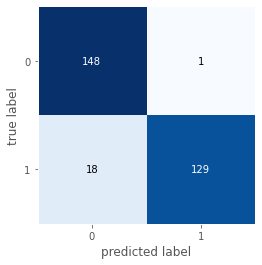

In [19]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(Y_test, classifier.predict(X_test))
print(classifier.score(X_test, Y_test))
plot_confusion_matrix(cm)

# let's build our Logistic Regression model


In [46]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn.metrics import f1_score

y_pred=logistic.predict(X_test)

f1_current= f1_score(Y_test,y_pred,average='macro')
f1_current

0.9425354300135895

0.9425675675675675


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d180cd1b08>)

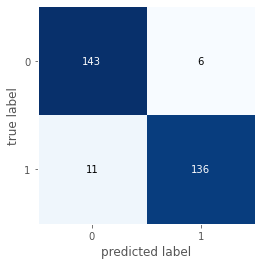

In [48]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(Y_test, logistic.predict(X_test))
print(logistic.score(X_test, Y_test))
plot_confusion_matrix(cm)

In [49]:
print("model accuracy on train: {:.4f}".format(logistic.score(X_train, Y_train)))
print("model accuracy on test: {:.4f}".format(logistic.score(X_test, Y_test)))

model accuracy on train: 0.9564
model accuracy on test: 0.9426


# let's build our KNN model

In [26]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

accs_test = []
accs_train = []
ks = np.linspace(1, 10, 10)
for K in ks:
    classifier = KNeighborsClassifier(n_neighbors=int(K))
    classifier.fit(X_train, Y_train)
    cm = confusion_matrix(Y_test, classifier.predict(X_test))
    accs_train.append(classifier.score(X_train, Y_train))
    accs_test.append(classifier.score(X_test, Y_test))

Text(0.5, 1.0, 'accuracy versus K')

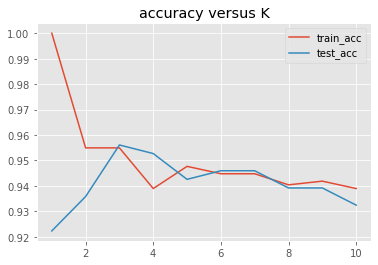

In [27]:
plt.plot(ks, accs_train, label='train_acc')
plt.plot(ks, accs_test, label='test_acc')
plt.legend()
plt.title("accuracy versus K")

In [29]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## take a look at the confusion matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d180b37e08>)

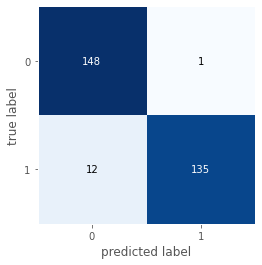

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classifier.predict(X_test))
plot_confusion_matrix(cm)

In [33]:
print("model accuracy on train: {:.4f}".format(classifier.score(X_train, Y_train)))
print("model accuracy on test: {:.4f}".format(classifier.score(X_test, Y_test)))

model accuracy on train: 0.9549
model accuracy on test: 0.9561


# let's build our Naive Bayes classification model

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Let's see the confusion matrix first 

0.9244186046511628
0.902027027027027


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d180b373c8>)

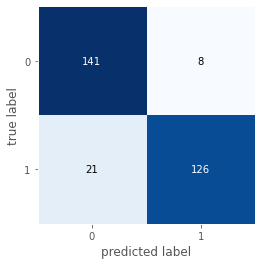

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, classifier.predict(X_test))
print(classifier.score(X_train, Y_train))

print(classifier.score(X_test, Y_test))

plot_confusion_matrix(cm)

# let's build our Bernoulli model


In [38]:
from sklearn.naive_bayes import BernoulliNB

In [41]:
clf = BernoulliNB()
clf.fit(X_train, Y_train)
clf.predict(X_test)


print(clf.score(X_train, Y_train))
clf.score(X_test, Y_test)

0.9026162790697675


0.8952702702702703

# The best accuracy is KNN model